# Homework 03: Table Manipulation and Visualization

**Reading**: 
* [Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Note: This homework has hidden tests on it. Additional tests will be run once your homework is submitted for grading. While you may pass all the tests you have access to before submission, you may not earn full credit if you do not pass the hidden tests as well.**. 

Many of the tests you have access to before submitting only test to ensure you have given an answer that is formatted correctly and/or you have given an answer that *could* make sense in context. For example, a test you have access to while completing the assignment may check that you selected a valid choice for a multiple choice problem (1, 2, or 3) or that your answer is an integer between 0 and 50 if asked to count a subset of states in the United States. The tests that are run after submission will evaluate your work for accuracy. **Do not assume that just because all your tests pass before submission means that your answers are correct!**

Consult with your teacher and course syllabus for information and policies regarding appropriate collaboration with other students, appropriate use of AI tools, and submission of late work.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, **the percentage who can't find a job**.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, **the percentage who can't find any job** *or* **are only working at a part-time job**.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

Both metrics are calculated **monthly** by the Federal Reserve Bank of Richmond. For further information about this data, go to Federal Reserve Bank of Richmond's website on [Hornstein-Kudlyak-Lange Non-Employment Index](https://www.richmondfed.org/research/national_economy/non_employment_index). The original source of the data is [here for NEI](https://fred.stlouisfed.org/series/NEIM156SFRBRIC) and [here for NEI-PTER](https://fred.stlouisfed.org/series/NEIPTERM156SFRBRIC).

#### Question 1.1.

The data are provided in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [2]:
unemployment = Table().read_table('unemployment.csv') # SOLUTION
unemployment

Date,NEI,NEI-PTER
1994-01-01,9.98073,11.0434
1994-02-01,9.80638,10.9667
1994-03-01,9.70025,10.9147
1994-04-01,9.56791,10.7528
1994-05-01,9.35897,10.5746
1994-06-01,9.34942,10.5643
1994-07-01,9.29226,10.4536
1994-08-01,9.24167,10.3608
1994-09-01,9.15134,10.2626
1994-10-01,9.07711,10.2174


In [3]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.5
success_message: ✅ You assigned a Table to `unemployment`
failure_message: ❌ You did not assign a Table to `unemployment`
""" # END TEST CONFIG

type(unemployment) == Table

True

In [4]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.5
success_message: ✅ Your Table has the correct labels
failure_message: ❌ Your Table doesn't have the correct labels, did you load in the correct file?
""" # END TEST CONFIG

unemployment.labels == ('Date', 'NEI', 'NEI-PTER')

True

#### Question 1.2.

Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

In [5]:
by_nei = unemployment.sort('NEI', descending=True) # SOLUTION
by_nei_pter = unemployment.sort('NEI-PTER', descending=True) # SOLUTION

In [6]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.5
success_message: ✅ You sorted the NEI Table correctly
failure_message: ❌ You did not sort the NEI Table correctly. Did you sort in ascending order?
""" # END TEST CONFIG

by_nei.take(0)

Date,NEI,NEI-PTER
2020-04-01,15.5246,17.7342


In [7]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.5
success_message: ✅ You sorted the NEI-PTER Table correctly
failure_message: ❌ You did not sort the NEI-PTER Table correctly. Did you sort in ascending order?
""" # END TEST CONFIG

by_nei_pter.take(0)

Date,NEI,NEI-PTER
2020-04-01,15.5246,17.7342


#### Question 1.3.

Use `take` to make a table that only has the `Date` and `NEI` columns which contains only the data for the 10 months when NEI was the greatest. Call the new Table `greatest_nei` and sort it in descending order based on the `NEI` column. Recall that each row of `unemployment` represents a month.

**Hint:** You will need to remember / look up how to keep only certain columns and rows from a Table.

In [8]:
greatest_nei = by_nei.drop('NEI-PTER').take(np.arange(10)) # SOLUTION
greatest_nei

Date,NEI
2020-04-01,15.5246
2020-05-01,14.2787
2020-06-01,12.5196
2020-07-01,11.9134
2009-10-01,10.9409
2009-06-01,10.9056
2009-05-01,10.8654
2009-12-01,10.8597
2009-09-01,10.8282
2009-11-01,10.7959


In [9]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.25
success_message: ✅ Your Table has 10 rows
failure_message: ❌ Your Table does not have 10 rows. Make sure you're using `take` and not `show` to keep the top 10 rows.
""" # END TEST CONFIG

greatest_nei.num_rows == 10

True

In [10]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.25
success_message: ✅ Your Table has the correct column labels, and you dropped the NEI-PTER column
failure_message: ❌ Your Table does not have the correct labels and/or has an incorrect number of columns. Make sure you remove the NEI-PTER column
""" # END TEST CONFIG

greatest_nei.num_columns == 2 and greatest_nei.labels == ('Date', 'NEI')

True

In [11]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.25
success_message: ✅ The first row is correct
failure_message: ❌ The first row is incorrect
""" # END TEST CONFIG

greatest_nei.take(0)

Date,NEI
2020-04-01,15.5246


In [12]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.25
success_message: ✅ The last row is correct
failure_message: ❌ The last row is incorrect
""" # END TEST CONFIG

greatest_nei.take(9)

Date,NEI
2009-11-01,10.7959


#### Question 1.4.

It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009 and during the first phase of the COVID-19 pandemic in 2020-2021. The next few questions will help you to create a set of data that will allow you to investigate this claim.

Recall that NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER. **Compute an array** containing the percentage of people who were only PTER in each month.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [13]:
pter = unemployment.column('NEI-PTER') - unemployment.column('NEI') # SOLUTION
pter

array([ 1.06268125,  1.16031337,  1.21447796,  1.18488823,  1.2155997 ,
        1.21486897,  1.16137029,  1.11913143,  1.11125425,  1.14026505,
        1.15066178,  1.1175817 ,  1.19065066,  1.08464624,  1.10303127,
        1.09144925,  1.12984901,  1.12338822,  1.13581842,  1.14549928,
        1.15257142,  1.12202652,  1.13609871,  1.10910461,  1.04012698,
        1.08690148,  1.095194  ,  1.08253731,  1.07672746,  1.07318674,
        1.10691565,  1.09952705,  1.08671488,  1.08364285,  1.00779434,
        1.08013353,  1.06170078,  1.03680459,  1.01050837,  1.04386578,
        0.99504918,  0.98370354,  1.01387767,  0.99811532,  0.98111969,
        0.97828148,  0.9729393 ,  0.94299517,  0.97691556,  0.94252929,
        0.93798693,  0.88237957,  0.91585941,  0.922517  ,  0.94849739,
        0.86819142,  0.84112623,  0.8400447 ,  0.80588641,  0.82482853,
        0.84136372,  0.82670565,  0.85485455,  0.7934364 ,  0.82915388,
        0.81957589,  0.82644957,  0.80163368,  0.79285552,  0.76

In [14]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.5
success_message: ✅ Your array has the correct number of elements
failure_message: ❌ `pter` is not an array and/or it does not have the correct number of elements in the array
""" # END TEST CONFIG

type(pter) == np.ndarray and len(pter) == 355

True

In [15]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.5
success_message: ✅ You correctly computed the PTER values
failure_message: ❌ You did not correctly compute the PTER values. Did you subtract the columns in the wrong order?
""" # END TEST CONFIG

np.isclose( np.average(pter), 1.1446692178957745 ) and np.isclose( np.std(pter), 0.34417583268451174 )

True

#### Question 1.5.

Add the `pter` array as a column named `PTER` to the original `unemployment` Table and sort the resulting Table by the `PTER` column in descending order. Call the new Table `by_pter`.

Try to do this with a single line of code, if you can.

In [16]:
by_pter = unemployment.with_column('PTER', pter).sort('PTER', descending=True) # SOLUTION
by_pter

Date,NEI,NEI-PTER,PTER
2020-04-01,15.5246,17.7342,2.20961
2020-05-01,14.2787,16.3533,2.07461
2009-03-01,10.5686,12.5078,1.93924
2010-03-01,10.7548,12.6927,1.93783
2009-07-01,10.7435,12.6749,1.93139
2009-05-01,10.8654,12.7964,1.93094
2009-06-01,10.9056,12.8341,1.92852
2009-08-01,10.7565,12.6766,1.92016
2010-04-01,10.6038,12.5229,1.91919
2009-12-01,10.8597,12.7655,1.90577


In [17]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.25
success_message: ✅ `by_pter` is Table
failure_message: ❌ `by_pter` is not a Table. Did you create an array by accident?
""" # END TEST CONFIG

type(by_pter) == Table

True

In [18]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.25
success_message: ✅ `by_pter` has the correct labels in the correct order
failure_message: ❌ `by_pter` has incorrect labels, or they are in the incorrect order
""" # END TEST CONFIG

by_pter.labels == ('Date', 'NEI', 'NEI-PTER', 'PTER')

True

In [19]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.5
success_message: ✅ `by_pter` Table is correctly sorted by the PTER column
failure_message: ❌ `by_pter` Table is not correctly sorted by the PTER column. Did you accidentally sort in ascending order? 
""" # END TEST CONFIG

np.allclose( by_pter.column('PTER').take(np.arange(10)), np.array([ 2.20961105,  2.07461204,  1.93924354,  1.93783426,  1.93139021, 1.93093857,  1.92852378,  1.92016155,  1.91918626,  1.90577312]))

True

#### Question 1.6.

It would be helpful to create a line plot of the PTER over time to see how it has changed over the years. Unfortunately, the `Date` column is a string that can't be used as the indendent variable of a line plot. You will need to create a new column, `Year`, that represents the year as a `float`. For example, January 1994 should be represented at `1994.0`, February 2000 should be represented as `2000.0833333333` (`0.0833333333` is $\approx \frac{1}{12}$), March 2020 would be represented as `2020.1666666667` and so on. 

First, think about how you could quickly create an array of these `float` values using a `numpy` function. Remember, the first row of the data starts with January 1994 (`1994.0`) and each row increases the year value by one twelfth of a year. Store this array to the name `year_array`.

Then, add both the `year_array` array and the `pter` array to the original `unemployment` table. Label these columns `Year` and `PTER`. 

Lastly, generate a line plot using one of the table methods you've learned in class.

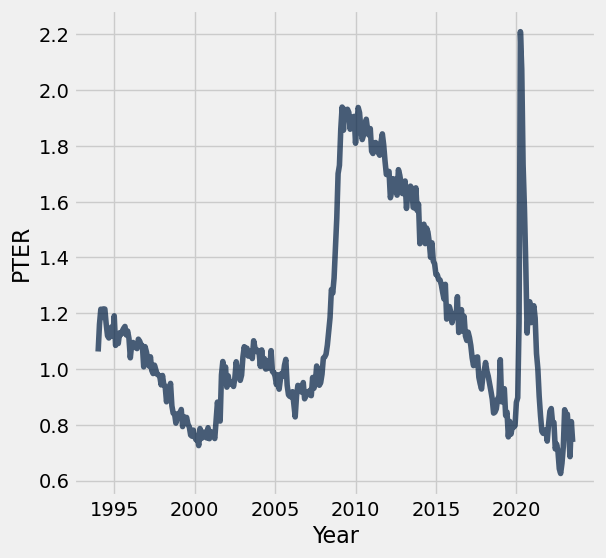

In [20]:
year_array = 1994 + (np.arange(by_pter.num_rows) / 12) # SOLUTION
pter_over_time = unemployment.with_columns('Year', year_array, 'PTER', pter) # SOLUTION
pter_over_time.plot('Year', 'PTER') # SOLUTION

#### Question 1.7.

Were PTER rates higher than usual during the Great Recession and during the COVID-19 pandemic (that is to say, were PTER rates particularly high in the years 2008-2011 and 2020-2021)? Write an explanation of your opinion backed by the data displayed in the line plot created in the previous question, and any additional statistical analysis you perform. Cite specific historical events that align with key dates when possible to add context to your explanation.

**SOLUTION:** The average PTER rate during the time period of the data set is about 1.145%. Starting in the year 2008 the PTER rate climbs to almost 2% before the year 2010 indicating that the Great Recession may have been the cause of the almost doubling of the PTER rate. The PTER rate takes until almost 2017 to return back to around this average value. Then, in early 2020 the PTER rate spikes to around 2.2% during the earliest phases of the COVID-19 pandemic. It quickly dropped as the USA reopened throughout the year 2020 and early 2021.

## 2. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2019 and July 1, 2020. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from the [US Census Website](https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/totals/). If you want to read more about the different column descriptions, click [here](https://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.pdf)!

The raw data is a bit messy and contains a large amount of additional data - run the cell below to pare down and clean the table to make it easier to work with.

In [21]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2020-alldata.csv').where('SUMLEV', 40).select(["REGION", "NAME", 'POPESTIMATE2019', 'POPESTIMATE2020', 'BIRTHS2020', 'DEATHS2020', 'NETMIG2020', 'RESIDUAL2020'])
pop = pop.relabeled('POPESTIMATE2019', '2019').relabeled('POPESTIMATE2020', '2020')
pop = pop.relabeled('BIRTHS2020', 'BIRTHS').relabeled('DEATHS2020', 'DEATHS')
pop = pop.relabeled('NETMIG2020', 'MIGRATION').relabeled('RESIDUAL2020', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2019,2020,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,907,965","4,921,532","56,739","58,354","15,193",-11
4,Alaska,"733,603","731,158","9,733","5,249","-6,902",-27
4,Arizona,"7,291,843","7,421,401","81,451","66,385","114,706",-214
3,Arkansas,"3,020,985","3,030,522","36,332","33,832","7,067",-30
4,California,"39,437,610","39,368,078","448,160","304,961","-213,510",779


Each of the columns `BIRTHS`, `DEATHS`, `MIGRATION`, and `OTHER` represent a change in the population of the state between 2019 and 2020, measured in individual people, due to: 

* **Births**. This number represents how much the population has increased due to births.
* **Deaths**. This number represents how much the population has decreased due to deaths. 
* **Migration**. This number represents how much the population has changed due to people moving in our out of the state. A positive number represents a net increase in the state population and a negative number represents a net decrease in the state population.
* **Other** This number represents how much the population has changed due to all other reasons. A positive number represents a net increase in the state population and a negative number represents a net decrease in the state population.

#### Question 2.1.

Investigate the national birth *rate* during this time period. Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?

In [22]:
us_birth_rate = np.sum(pop.column('BIRTHS'))/np.sum(pop.column('2019')) # SOLUTION
us_birth_rate

0.011365697851904354

In [23]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.1
success_message: ✅ Your birth rate is a single float
failure_message: ❌ Your birth rate is not a float. Did you compute an array instead?
""" # END TEST CONFIG

type(us_birth_rate) == float or type(us_birth_rate)== np.float64

True

In [24]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.15
success_message: ✅ Your birth rate is a proportion between 0 and 1
failure_message: ❌ Your birth rate is not a number between 0 and 1. Remember, the birth rate should be a proportion.
""" # END TEST CONFIG

0 < us_birth_rate < 1

True

In [25]:
""" # BEGIN TEST CONFIG
hidden: true
points: 0.75
""" # END TEST CONFIG

us_birth_rate == np.sum(pop.column('BIRTHS'))/np.sum(pop.column('2019'))

True

#### Question 2.2.

Investigate the states who had a relatively large percentage of their population move either into the state or out of the state. Use Table and array methods to determine the **number of states** that had more than 0.5% of their population move in or out. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. 

Start by creating an extension to the `population` Table named `migration_rates` that contains a new column that contains the value of the **annual *net* rate of migration** for each state. Then, determine how many states had net migration rates higher than 0.5%.



In [26]:
migration_rates = pop.with_column('Migration Rate', np.abs(pop.column('MIGRATION')/pop.column('2019'))) # SOLUTION
movers = migration_rates.where('Migration Rate', are.above(0.005)).num_rows # SOLUTION
movers

20

In [27]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
success_message: ✅ `migration_rates` is a Table
failure_message: ❌ `migration_rates` is not a Table
""" # END TEST CONFIG

type(migration_rates) == Table

True

In [28]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
success_message: ✅ `movers` is an intger
failure_message: ❌ `movers` is not an integer
""" # END TEST CONFIG

type(movers) == int or type(mover) == np.int64

True

In [29]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.1
success_message: ✅ `movers` is a number between 0 and 52
failure_message: ❌ `movers` is not a number between 0 and 52, but it should be since it represents a count of states in the USA
""" # END TEST CONFIG

0 < movers <= 52

True

In [30]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.1
success_message: ✅ You avoided a common mistake of only counting states with positive migration rates over 0.5 percent
failure_message: ❌ `movers` currently is counting only the states with positive migration rates over 0.5 percent, but it should count both the positive and negative rates over 0.5 percent
""" # END TEST CONFIG

movers != 14

True

In [31]:
""" # BEGIN TEST CONFIG
hidden: true
points: 0.8
""" # END TEST CONFIG

movers

20

#### Question 2.3.

Investigate the total number of births that occurred in the Southeastern US between 2019 and 2020. Use Table and array methods to assign the total number of births, an integer, that occurred in region 3 (the Southeastern US) to `southeast_births`.

In [32]:
southeast_births = np.sum(pop.where('REGION', are.equal_to(3)).column('BIRTHS')) # SOLUTION
southeast_births

1473609

In [33]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.1
success_message: ✅ `southeast_births` is an integer
failure_message: ❌ `southeast_births` is not an intger
""" # END TEST CONFIG

type(southeast_births) == int or type(southeast_births) == np.int64

True

In [34]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.1
success_message: ✅ `southeast_births` is correctly between 1,000,000 and 2,000,000.
failure_message: ❌ `southeast_births` is not between 1 and 2 million, which it should be. Are you including too many or too few states?
""" # END TEST CONFIG

1e6 < southeast_births < 2e6

True

In [35]:
""" # BEGIN TEST CONFIG
hidden: true
points: 0.8
""" # END TEST CONFIG

southeast_births

1473609

#### Question 2.4.

Assign `less_than_south_births` to the **number of states** that had a total population in 2019 that was smaller than the **total *number of births* in region 3 (the Southeastern US)** during this time interval.

In [36]:
less_than_south_births = pop.where('2019', are.below(southeast_births)).num_rows # SOLUTION
less_than_south_births

12

In [37]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.1
success_message: ✅ `southeast_births` is an integer
failure_message: ❌ `southeast_births` is not an intger
""" # END TEST CONFIG

type(less_than_south_births) == int or type(less_than_south_births) == np.int64

True

In [38]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.1
success_message: ✅ `less_than_south_births` is a number between 0 and 52
failure_message: ❌ `less_than_south_births` is not a number between 0 and 52, but it should be since it represents a count of states in the USA
""" # END TEST CONFIG

0 <= less_than_south_births <= 52

True

In [39]:
""" # BEGIN TEST CONFIG
hidden: true
points: 0.8
""" # END TEST CONFIG

less_than_south_births

12

#### Question 2.5. 

In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Scatter Plot
2. Line Graph
3. Vertical Bar Chart
4. Horizontal Chart
5. Histogram

Assign `visualization` below to the number corresponding to the correct visualization.

In [40]:
visualization = 1 # SOLUTION

In [41]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
success_message: ✅ You selected a valid choice (1, 2, 3, 4, or 5)
failure_message: ❌ You did not select a valid choice (1, 2, 3, 4, or 5). Double check your assignment statement.
""" # END TEST CONFIG

visualization in [1, 2, 3, 4, 5]

True

In [42]:
""" # BEGIN TEST CONFIG
hidden: true
points: 1
""" # END TEST CONFIG

visualization

1

#### Question 2.6. 

In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. You can take as many steps as you need, as you may find it helpful to create a new Table before creating the visualization.

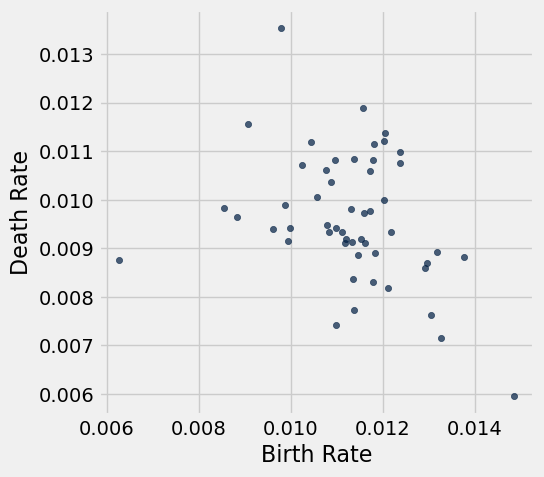

In [43]:
# Generate your chart in this cell
pop.with_columns('Birth Rate', pop.column('BIRTHS')/pop.column('2019'), 'Death Rate', pop.column('DEATHS')/pop.column('2019')).scatter('Birth Rate','Death Rate') # SOLUTION

#### Question 2.7.

Is there is an association between birth rate and death rate during this time interval? If so, how would you describe it? If not, how were you able to determine there was no association? **Write an explanation of your opinion backed by the data displayed in the visualization created in the previous question.** Offer an explanation as to why you believe it makes sense that there is or is not a correlation between these variables in context of the data. Meaning, why would it make sense for birth and death rates to have an association or not have an association?


**SOLUTION:** There is a moderate to strong negative association between Birth Rate and Death Rate. The shape of the scatter plot shows a trend such that, in general, as birth rates increase death rates decrease. This may make sense because states that have good a good health care system or a population in good health would see both high birth rates (less infant mortality) and low death rates. States with a population in poor health or a bad health care system would see the opposite.

## 3. Marginal Histograms


Consider the following scatter plot: 

![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given two histograms, each of which corresponds to either column `x` or column `y`. 

**Histogram A:** 

![](var1.png)

**Histogram B:** 

![](var2.png)

#### Question 3.1.

Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to either 1 or 2.

1. Histogram A
2. Histogram B

In [44]:
histogram_column_x = 2 # SOLUTION

In [45]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
success_message: ✅ You chose a valid answer, either 1 or 2
failure_message: ❌ You did not chose a valid answer. Make sure you assign the integer 1 or 2 to `histogram_column_x`
""" # END TEST CONFIG

histogram_column_x in [1, 2]

True

In [46]:
""" # BEGIN TEST CONFIG
hidden: true
points: 1
""" # END TEST CONFIG

histogram_column_x

2

#### Question 3.2.

State at least one reason why you chose the histogram from Question 3.1. Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...") and cite one or more specific characteristics from the scatter plot to support your choice.

**SOLUTION:** Because there are no gaps in the X-variable, we would expect the histogram for X to have no gaps in it. Also, because the two masses on the scatter plot overlap in the area between -1 and 0, we would expect there to be more mass in the -1 to 0 area of the histogram, since each vertical slice in this range contains more points. Also, the values of the X-variable range from -2 to 2, which fits the range of values in histogram B.

## 4. Uber


Every day millions of people use ride sharing apps, like Uber and Lyft, to get around their cities and towns. The [Uber Movement](https://movement.uber.com) project has released data on how people are traveling throughout some of the largest cities in the world. Investigate how Uber rides might be different in two large cities: Boston, MA in the USA and Manila in the Philippines.

Each data set below contains 200,000 weekday Uber rides for each city. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride, in minutes.

Run the cells below to load the data for both cities.

In [47]:
boston = Table.read_table("boston.csv")
boston

sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235
218,1189,7,42.5588
1048,461,7,26.4212
879,461,11,23.7743
1047,1002,17,36.3583
930,856,6,16.6407
1110,875,22,17.3533


In [48]:
manila = Table.read_table("manila.csv")
manila

sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597
599,125,9,49.685
611,397,18,28.0117
364,300,21,9.856
813,618,14,43.375
516,344,19,31.7333
591,444,1,18.7208


#### Question 4.1.

To start investigating the differences in these two cities, visualize the distribution of ride times in each of the cities.

Produce two histograms, one for each city, that shows the distribution of all ride times. Use the provided bin sizes that are stored to the array `equal_bins` and **assign the horizontal label to have the correct units**. Need to remember how? Reread [7.2.2: Histograms ](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html#histogram) in the textbook!

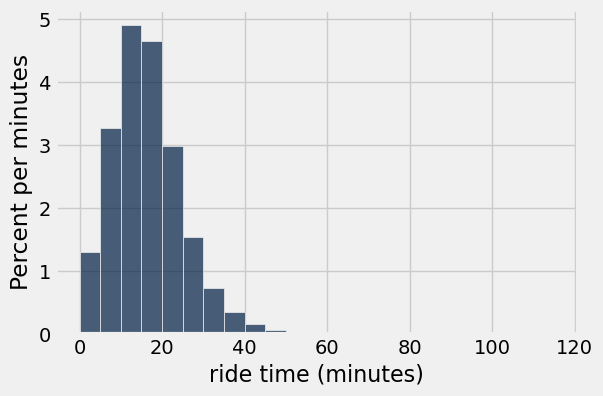

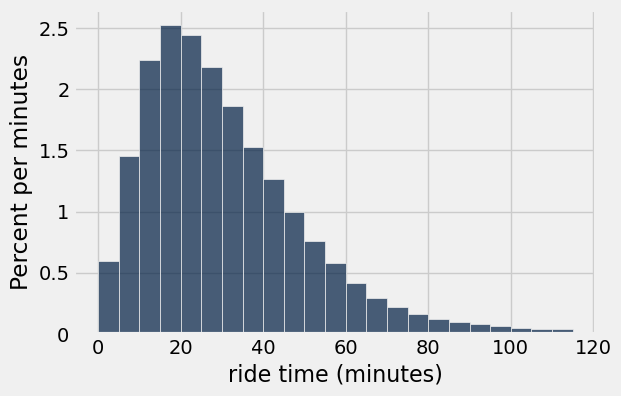

In [49]:
equal_bins = np.arange(0, 120, 5)
boston.select('ride time').hist(bins = equal_bins, unit="minutes") # SOLUTION
manila.select('ride time').hist(bins = equal_bins, unit="minutes") # SOLUTION

#### Question 4.2.

Assign `boston_under_10` and `manila_under_10` to the percentage of rides that are less than 10 minutes in their respective metropolitan areas. The table below shows you the height of each bar in the histogram, measured in percent per minute, for the first few bars of the histograms you produced in the previous question.

| bin | Boston | Manilla |
|-----|--------|---------|
|[0, 5) | 1.2 | 0.6 |
|[5, 10) | 3.2 | 1.4 |
|[10, 15) | 4.95| 2.25|
|[15, 20) | 4.6 | 2.55 |

Your solution should be determined using only the information in this table, and you should not access the tables `boston` and `manila` in any way.

In [50]:
boston_under_10 = 5*1.2 + 5*3.2 # SOLUTION
manila_under_10 = 5*0.6 + 5*1.4 # SOLUTION

In [51]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.1
success_message: ✅ `boston_under_10` is between 0 and 100, which makes sense since it represents a percentage
failure_message: ❌ `boston_under_10` is not between 0 and 100, but it should since it represents a percentage
""" # END TEST CONFIG

boston_under_10 >=0 and boston_under_10 <= 100

True

In [52]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0.1
success_message: ✅ `manila_under_10` is between 0 and 100, which makes sense since it represents a percentage
failure_message: ❌ `manila_under_10` is not between 0 and 100, but it should since it represents a percentage
""" # END TEST CONFIG

manila_under_10 >=0 and manila_under_10 <= 100

True

In [53]:
""" # BEGIN TEST CONFIG
hidden: true
points: 0.4
""" # END TEST CONFIG

boston_under_10

22.0

In [54]:
""" # BEGIN TEST CONFIG
hidden: true
points: 0.4
""" # END TEST CONFIG

manila_under_10

10.0

#### Question 4.3.

Let's take a closer look at the distribution of ride times in Manila. Assign `manila_median_bin` to an integer (1, 2, 3, or 4) that corresponds to the bin that contains the median time 

1. 0-15 minutes  
2. 15-40 minutes  
3. 40-60 minutes  
4. 60-80 minutes  

**Hint:** The median of a sorted list has half of the list elements to its left, and half to its right

In [55]:
manila_median_bin = 2 # SOLUTION

In [56]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
success_message: ✅ You selected a valid choice (1, 2, 3, or 4)
failure_message: ❌ You did not select a valid choice (1, 2, 3, or 4)
""" # END TEST CONFIG

manila_median_bin in [1,2,3,4]

True

In [57]:
""" # BEGIN TEST CONFIG
hidden: true
points: 1
""" # END TEST CONFIG

manila_median_bin == 2

True

#### Question 4.4.

Describe the main differences between the two histograms / the differences between the distributions of Uber ride lengths in these two cities. What about these two cities might be causing the differences in the distributions of ride times? 

**Write an explanation** of your opinion backed by the data displayed in the histograms created in the previous questions, and any additional statistical analysis you perform. Cite specific qualities of these cities when possible to add context to your explanation.

**SOLUTION:** Long rides make up a greater proportion of all Uber rides in Manila than in Boston. This could be because there's more traffic in Manila, or because the weather is not pleasant in Boston in the winter, so people may choose to take a car for short trips rather than walk.

# Submitting your work
You're done with this assignment! Assignments should be turned in using the following best practices:
1. Save your notebook.
2. Restart the kernel and run all cells up to this one.
3. Run the cell below with the code `grader.export(...)`. This will re-run all the tests. Make sure they are passing as you expect them to.
4. Download the file named `hw03_<date-time-stamp>.zip`, found in the explorer pane on the left side of the screen. **Note**: Clicking on the link in this notebook may result in an error, it's best to download from the file explorer panel.
5. Upload `hw03_<date-time-stamp>.zip` to the corresponding assignment on Canvas.